In [1]:
#Importing the Relevant Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the train dataset
train = pd.read_csv('C:/Users/admin/Downloads/train.csv')
train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [3]:
# The size of the train data set was examined. It consists of 6650 observation units and 11 variables.
train.shape

(6650, 11)

In [4]:
# Reading the test dataset
test = pd.read_csv('C:/Users/admin/Downloads/test.csv')
test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [5]:
# The size of the test data set was examined. It consists of 2851 observation units and 10 variables.
test.shape

(2851, 10)

In [6]:
#To Describe 
train.describe

<bound method NDFrame.describe of             ID  Age  Gender         Income     Balance  Vintage  \
0     84e2fcc9   36  Female       5L - 10L   563266.44        4   
1     57fea15e   53  Female   Less than 5L   875572.11        2   
2     8df34ef3   35  Female  More than 15L   701607.06        2   
3     c5c0788b   43  Female  More than 15L  1393922.16        0   
4     951d69c4   39  Female  More than 15L   893146.23        1   
...        ...  ...     ...            ...         ...      ...   
6645  a8216afd   61    Male       5L - 10L  1354526.19        4   
6646  153a306b   42  Female       5L - 10L   596286.54        3   
6647  d4075a95   29    Male   Less than 5L   979298.19        2   
6648  5855b142   66  Female      10L - 15L   395233.65        3   
6649  57b39511   37    Male  More than 15L   826947.27        1   

      Transaction_Status Product_Holdings  Credit_Card Credit_Category  \
0                      0                1            0         Average   
1            

In [7]:
#To Know the Data types
train.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

In [8]:
#To Check Null Values
train.isnull().any()

ID                    False
Age                   False
Gender                False
Income                False
Balance               False
Vintage               False
Transaction_Status    False
Product_Holdings      False
Credit_Card           False
Credit_Category       False
Is_Churn              False
dtype: bool

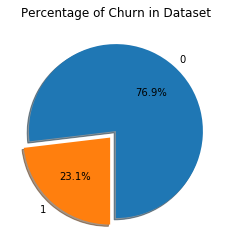

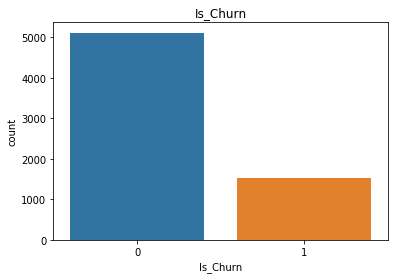

In [9]:
#Exploratory Data Analysis
# Data to plot
sizes = train['Is_Churn'].value_counts()
labels=0,1
explode = (0, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode,autopct='%1.1f%%',labels=labels, shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

sns.countplot('Is_Churn',data=train)
plt.title('Is_Churn')
plt.show()


In [10]:
#Feature Engineering
train["AgeScore"] = pd.qcut(train['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
train["BalanceScore"] = pd.qcut(train['Balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

test["AgeScore"] = pd.qcut(test['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
test["BalanceScore"] = pd.qcut(test['Balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [11]:
train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,AgeScore,BalanceScore
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1,3,4
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0,7,6
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0,3,5
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1,5,9
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1,4,6


In [12]:
#One Hot Encoding
train = pd.get_dummies(train, columns =["Gender"], drop_first = True)
train.head()

test = pd.get_dummies(test, columns =["Gender"], drop_first = True)

In [13]:
#Scaling
train = train.drop(["ID","Age","Income","Balance","Credit_Category","Product_Holdings"], axis = 1)
test = test.drop(["ID","Age","Income","Balance","Credit_Category","Product_Holdings"], axis = 1)
train.head()

,Vintage,Transaction_Status,Credit_Card,Is_Churn,AgeScore,BalanceScore,Gender_Male
0,4,0,0,1,3,4,0
1,2,1,1,0,7,6,0
2,2,1,0,0,3,5,0
3,0,1,1,1,5,9,0
4,1,1,1,1,4,6,0


In [14]:
# Train-Test Separation & Balancing
Y = train["Is_Churn"].values
X = train.drop(labels = ["Is_Churn"],axis = 1)
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5320, 6), (1330, 6), (5320,), (1330,))

In [16]:
#Modelling
models = []
models.append(('LR', LogisticRegression(random_state = 5160)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 5160)))
models.append(('RF', RandomForestClassifier(random_state = 5160)))
models.append(('SVM', SVC(gamma='auto', random_state = 5160)))
models.append(('XGB', GradientBoostingClassifier(random_state = 5160)))

# evaluate each model in turn
results = []
names = []

In [17]:
#Accuracy Score and F1_Score
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)*100
        f1score=f1_score(y_test, y_pred)
        msg = "%s Accuracy Score: (%f)" % (name, accuracy)
        msg1 = "%s F1_Score: (%f)" % (name, f1score)
        print(msg)
        print(msg1)

LR Accuracy Score: (78.721805)
LR F1_Score: (0.027491)
KNN Accuracy Score: (74.887218)
KNN F1_Score: (0.204762)
CART Accuracy Score: (71.654135)
CART F1_Score: (0.238384)
RF Accuracy Score: (71.353383)
RF F1_Score: (0.274286)
SVM Accuracy Score: (78.796992)
SVM F1_Score: (0.034247)
XGB Accuracy Score: (78.270677)
XGB F1_Score: (0.099688)


In [20]:
submission = pd.read_csv('C:/Users/admin/Downloads/sample.csv')
final_predictions = model.predict(test)
submission['Is_Churn'] = final_predictions
#only positive predictions for the target variable
submission['Is_Churn'] = submission['Is_Churn'].apply(lambda x: 1 if x>0 else x)
submission.to_csv('my_submission.csv', index=False)
